<a href="https://colab.research.google.com/github/HectorElizarraraz/CPSC456Assignment3/blob/main/Project_1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was completed by Hector Elizarraraz and Marco Salinas

###1. Load and examine the Boston dataset features, target values and description### 

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

dataSet = load_boston()


# print("Features:")
# print(dataSet.feature_names)
# print("Target values:")
# print(dataSet.target)
# print("Description:")
# print(dataSet.DESCR)

dataFrame_x = pd.DataFrame(dataSet.data, columns = dataSet.feature_names)
dataFrame_y =pd.DataFrame(dataSet.target)

print(dataFrame_x)
dataFrame_x.describe()



        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### 2. Create a scatterplot showing the relationship between the feature LSTAT and the target value MEDV. Does the relationship appear to be linear? ###

Text(0, 0.5, 'MEDV')

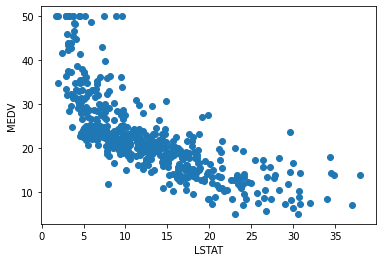

In [ ]:
import matplotlib.pyplot as plt

targets = dataSet.target #MEDV
features = dataSet.data.T

LSTATFeature = features[12]

plt.scatter(LSTATFeature, targets)
plt.xlabel(dataSet.feature_names[12])
plt.ylabel("MEDV")

###The relationship appears to be linear.####

### 3. Create and fit() an sklearn.linear_model.LinearRegression model using LSTAT as a predictor of MEDV. Using the coef_ and intercept_ attributes of the model, what is the equation for MEDV as a function of LSTAT? ###

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()


LSTATFeature=LSTATFeature.reshape(-1,1)
print ("THis is targets shape: ")
print(targets.shape)

reg.fit(LSTATFeature, targets)

print('Coeficients: \n', reg.coef_ )

print('Intercept: \n', reg.intercept_)





THis is targets shape: 
(506,)
Coeficients: 
 [-0.95004935]
Intercept: 
 34.5538408793831


###MEDV = 0.11x + 12.627

### 4. Use the predict() method of the model to find the response for each value of the LSTAT attribute in the dataset. Using sklearn.metrics.mean_squared_error(), find the average loss 𝓛 for the model. ###

In [ ]:
 from sklearn.metrics import mean_squared_error

prediction= reg.predict(LSTATFeature) 

mean_squared_error(targets, prediction)


38.48296722989415

###5. Add a line to your scatter plot representing the least sqaures fit data. How well does the model fit the data? ###

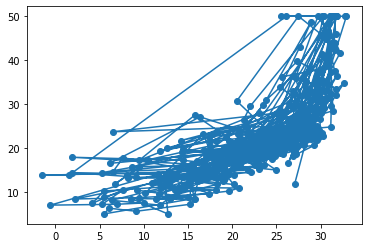

In [ ]:

plt.scatter(prediction, targets)
plt.plot(prediction, targets)

###The line does not fit the data very well. This is expected since we have a large mean sqaured error. ###

###6. Now repeat experiments (3) and (4) using all 13 input features at the same time. How does the average loss change?###

In [ ]:
# from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

X, y = datasets.load_boston(return_X_y=True)
Reg = LinearRegression()

Reg.fit(X, y)

prediction = Reg.predict(X)

print('Coeficients: \n' ,Reg.coef_)
print('Intercept: \n', Reg.intercept_)

print("Mean Sqaured error")
mean_squared_error(prediction , y)




# plt.plot(y, prediction)

Coeficients: 
 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Intercept: 
 36.459488385090125
Mean Sqaured error


21.894831181729202

###The average loss decreased significantly###

### 7. Based on the coef_ attributes of the new model, which features are desirable in a home? Which features detract from its value?###

### The desired attributes in a home are ZN, INDUS, CHAS, RM, AGE, RAD, and B 1000. ###
###The negative attributes are:  CRIM, NOX, DIS, TAX, PTRATIO,LSTAT ###

###8. Given the coef_ attributes, find the following for each feature: how much does a one unit increase in that feature change the median value of the home? Give your answer in dollars.


###CRIM = -39,  ZN = 434 INDUS = 2, CHAS = 3,043, NOX = -1845, RM = 4,086  AGE = 10, DIS = -1403, RAD = 288, TAX = -10, PTRATIO = -1004, B 1000 = 10, LSTAT = -543###

###9. Based on the amount of change in the value of the home, which features don’t seem to be important? ###

###The features that are not important are CRIM, ZN, INDUS, AGE, RAD, TAX, B 1000, LSTAT. ###